In [1]:
import os
HOME=os.getcwd()
print(HOME)

D:\ELISA-ML\notebooks


In [ ]:
# !pip install ultralytics==8.0.20

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
# from ultralytics import YOLO

# from IPython.display import display, Image

In [6]:
os.makedirs(f'{HOME}/datasets')
os.chdir(f'{HOME}/datasets')

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="UjR0GZfWWjsUbjZQk4nv")
project = rf.workspace("elisa").project("eliza")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Eliza-3 in yolov5pytorch:: 100%|██████████████████| 156/156 [00:00<00:00, 651.36it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=516 plots=True

Streaming output truncated to the last 5000 lines.
                    h6          6         12      0.791          1       0.91      0.796
                    h8          6          6      0.133      0.333      0.229      0.204
                    h9          6          6      0.578      0.333      0.665      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     44/100      6.49G     0.8251      1.455     0.9394       1860        544: 100% 4/4 [00:08<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.77it/s]
                   all          6        575      0.496      0.776      0.679      0.567
                    a1          6          6      0.872          1      0.995      0.846
                   a10          6          6      0.313      0.833      0.413      0.318
                   a11          6          6       0.39          1       0.78      0.627
          

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg  weights
events.out.tfevents.1684313796.07b4fc19927a.5006.0  train_batch1.jpg
results.csv					    train_batch2.jpg


/content


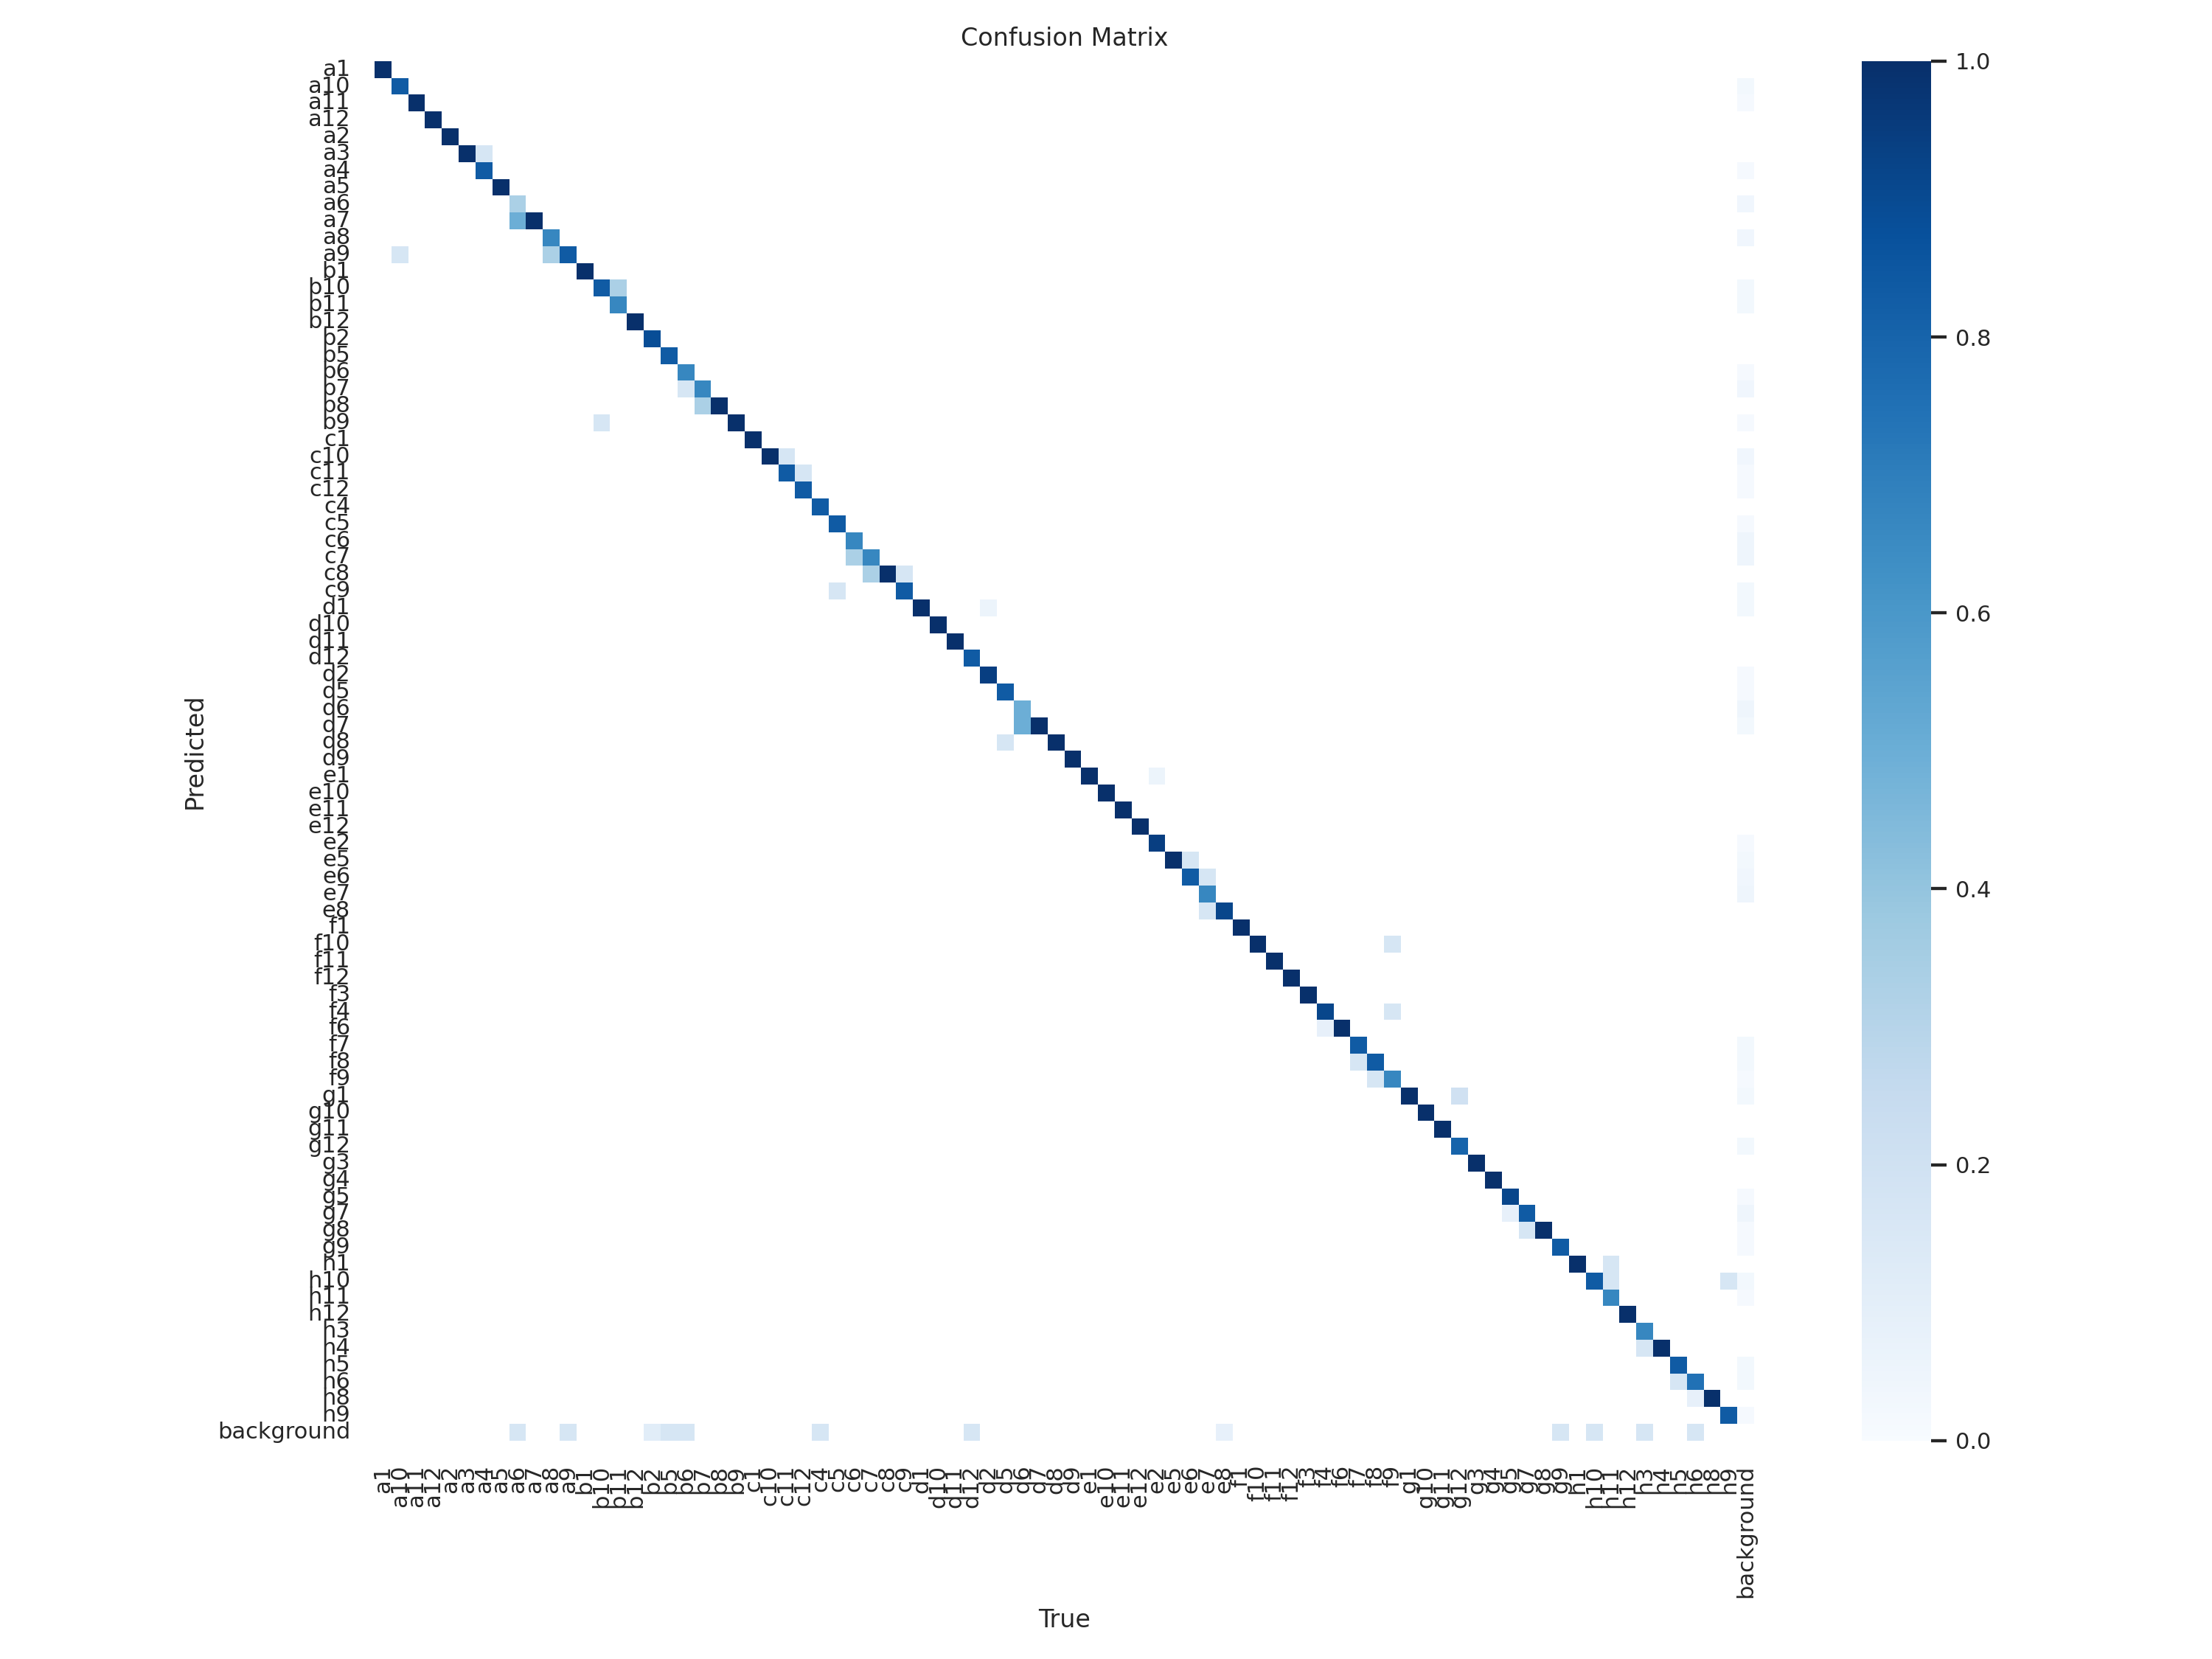

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=800)

/content


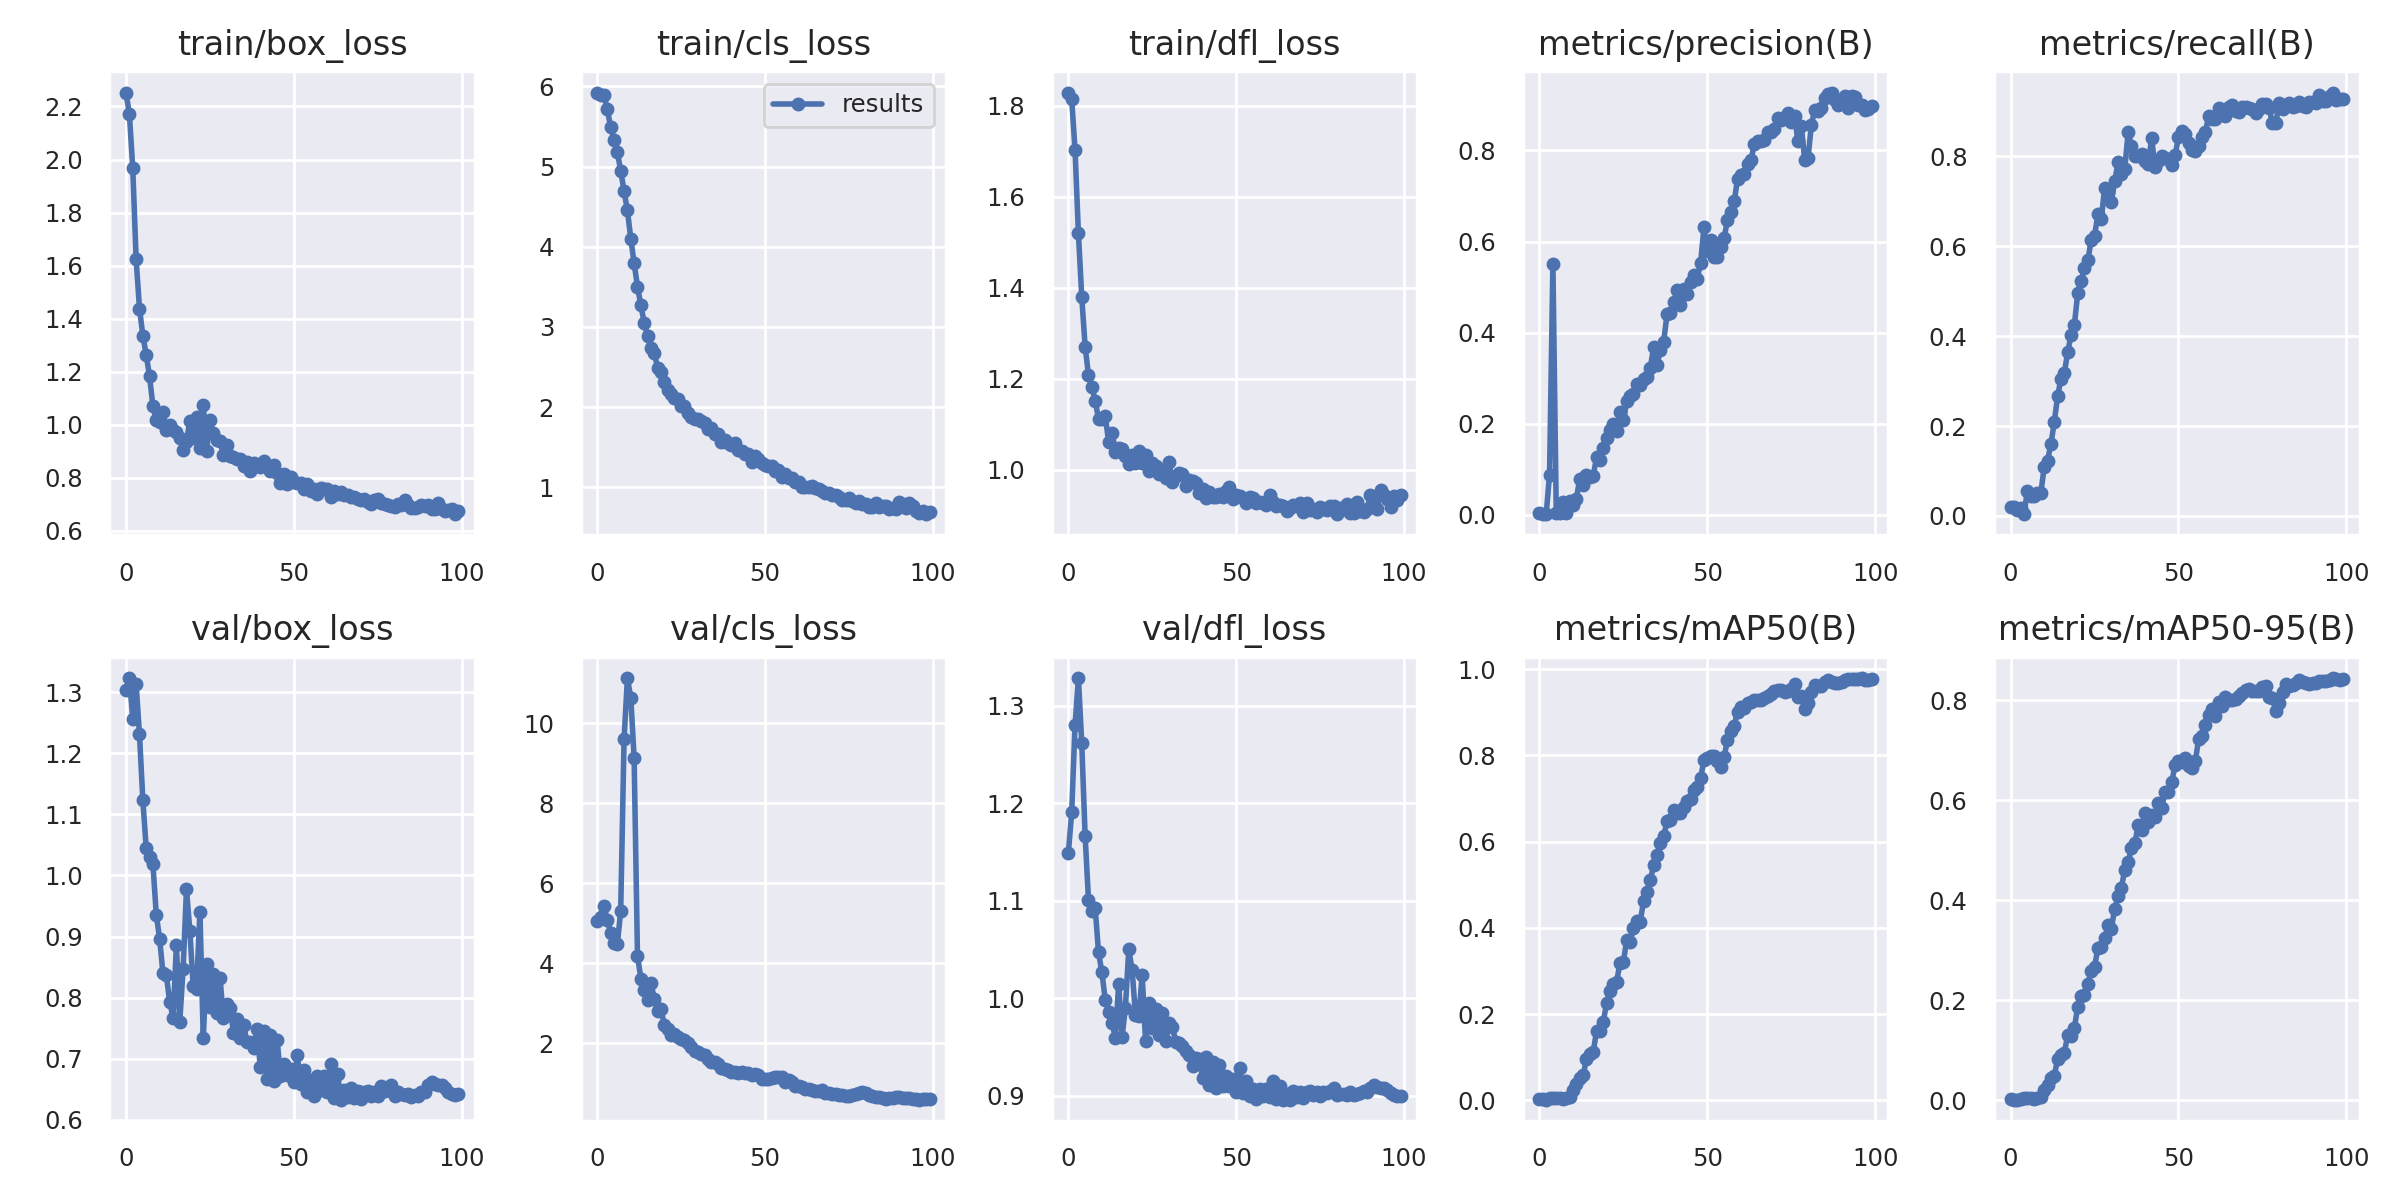

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content


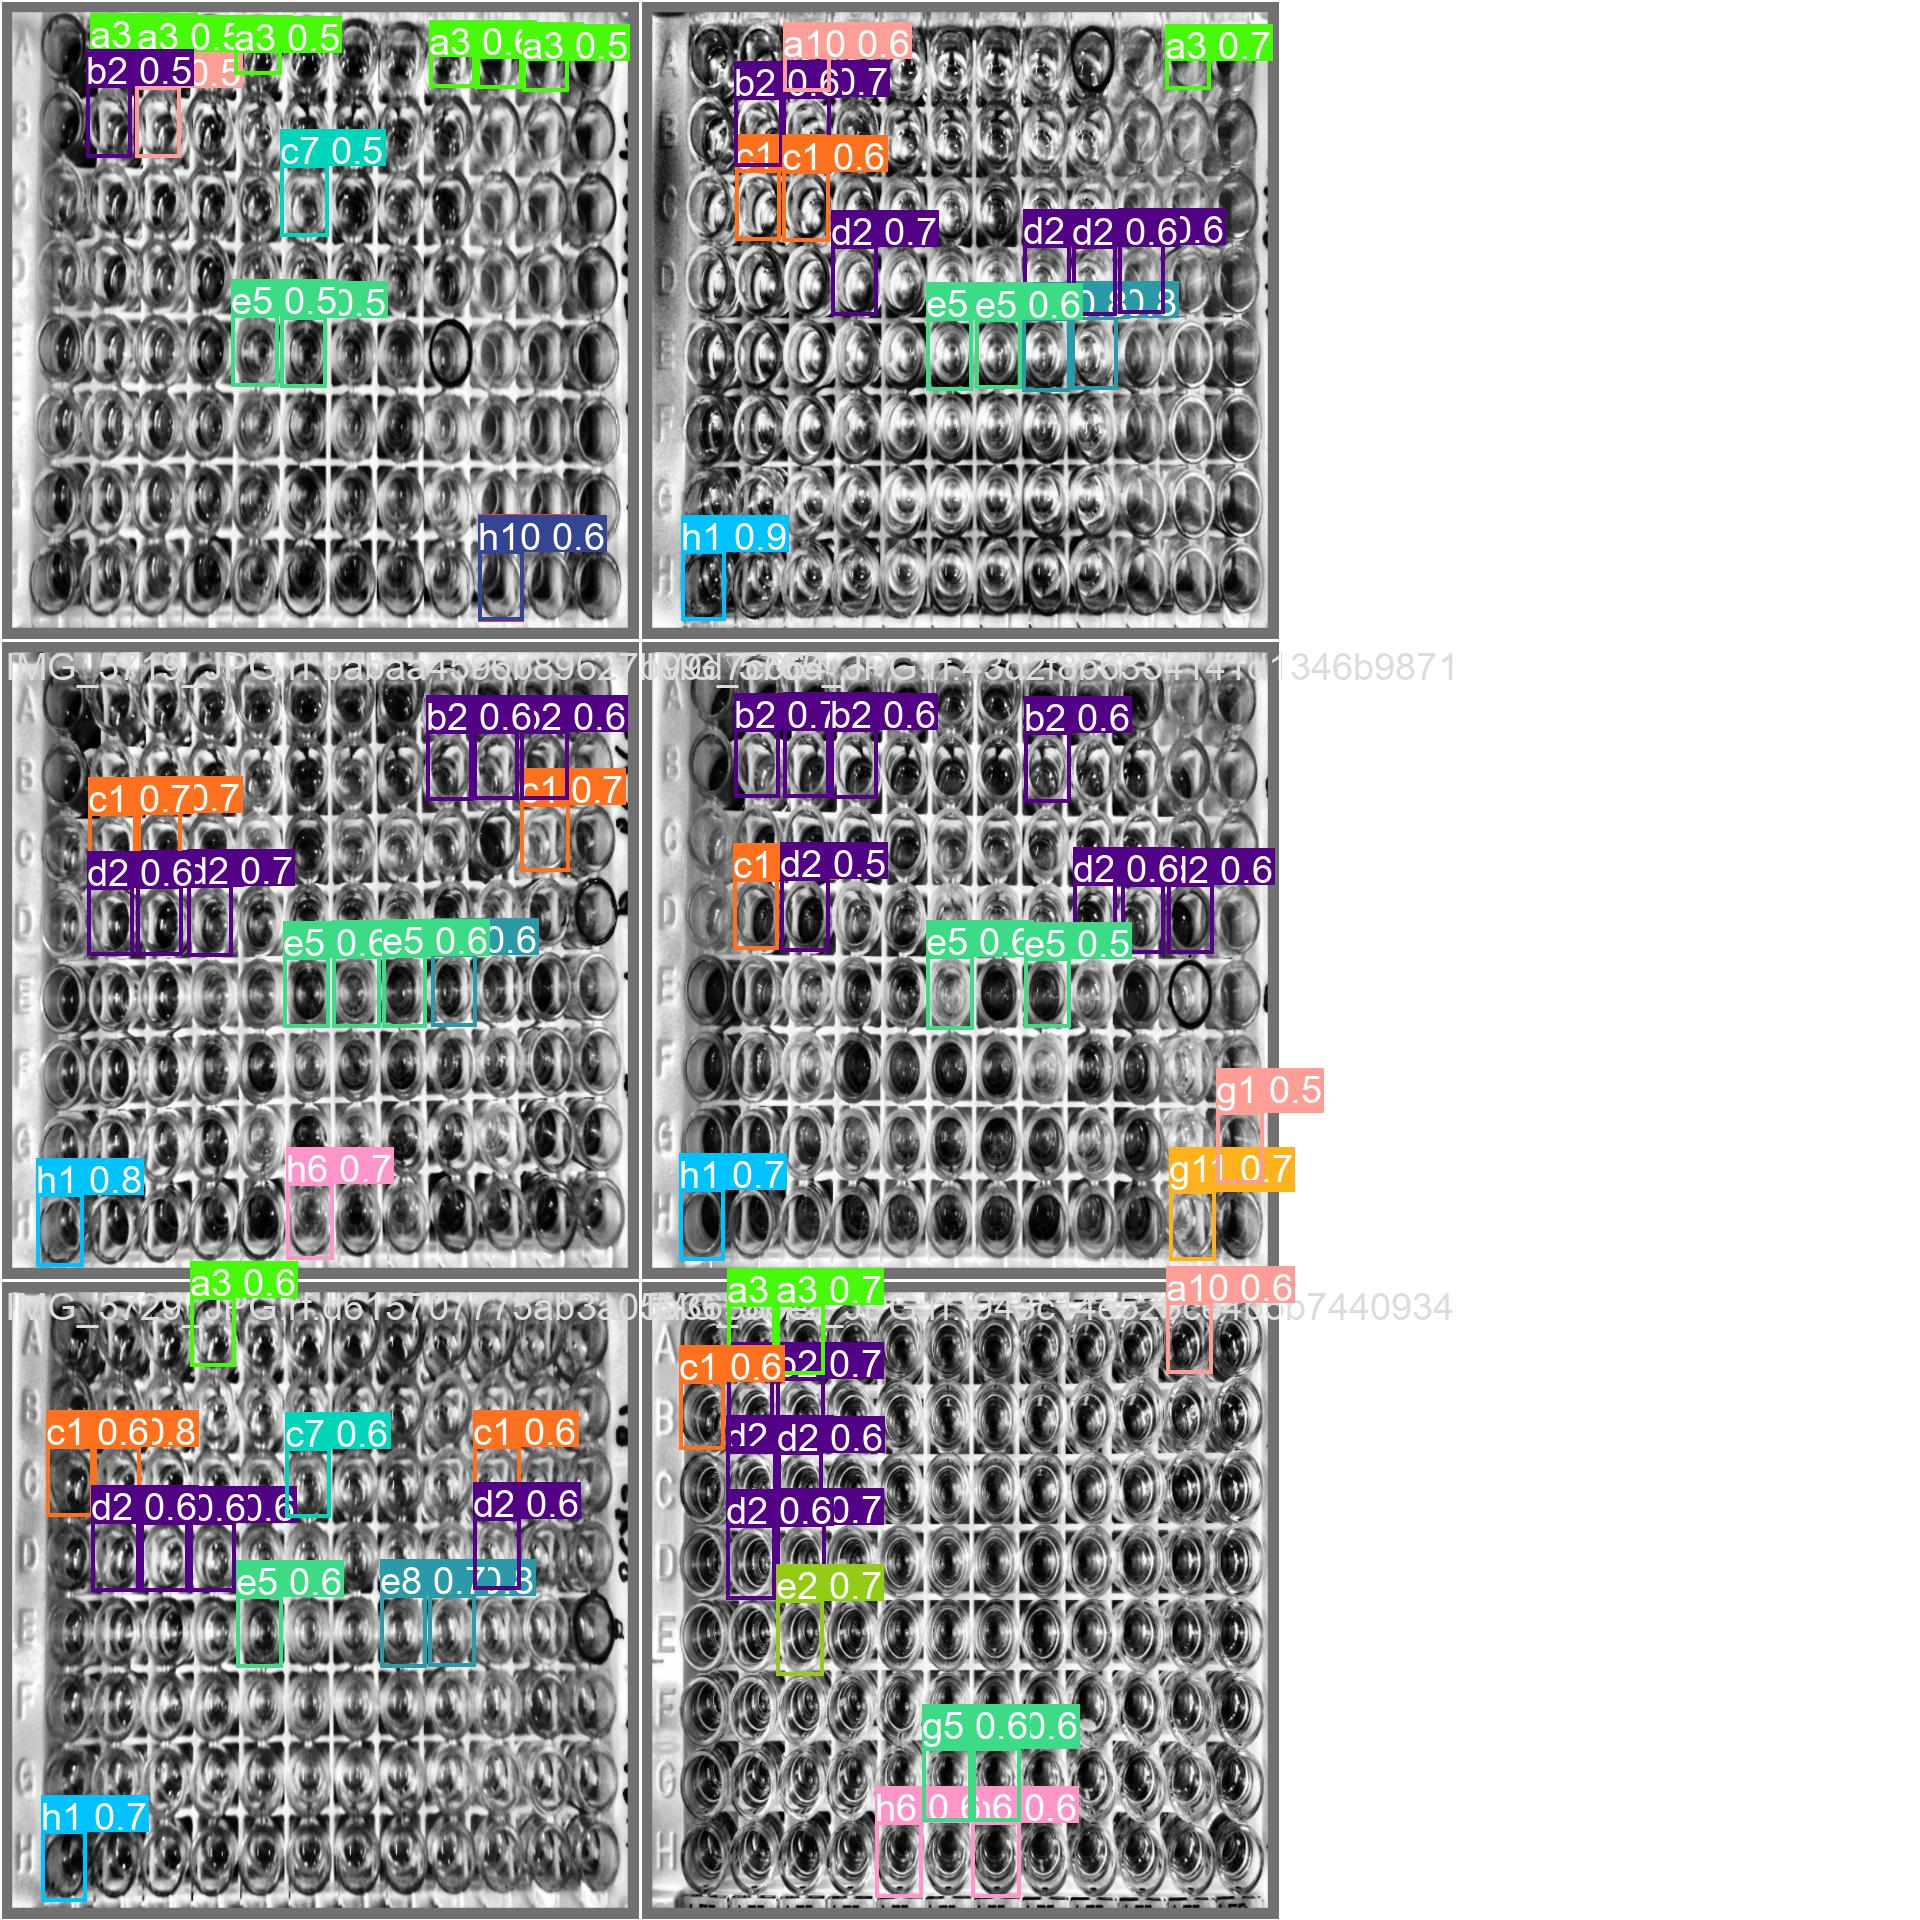

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-17 09:44:02.636834: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 09:44:03.577975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11156931 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets/Eliza-3/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.43it/s]
                   all          6        575        0.9      0.942      0.979      0.845
                    a1          6          6      

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-05-17 09:45:05.372881: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 09:45:06.293640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11156931 parameters, 0 gradients, 28.6 GFLOPs
image 1/3 /content/datasets/Eliza-3/test/images/IMG_5750_JPG.rf.789dfecb1651011f75d36c7907c77683.jpg: 544x544 1 a1, 1 a10, 1 a11, 2 a12s, 1 a2, 1 a3, 1 a4, 1 a5, 1 a6, 2 a7s, 1 a8, 1 a9, 1 b1, 1 b10, 1 b11, 2 b12s, 3 b2s, 1 b5, 1 b6, 2 b7s, 1 b8, 1 b9, 3 c1s, 2 c10s, 1 c11, 1 c12, 1 c4, 1 c5, 1 c6, 1 c7, 1 c8, 1 c9, 1 d1, 1 d10, 1 d11, 1 d12, 3 d2s, 1 d5, 1 d6, 2 d7s, 1 d8, 1 d9, 1 e1

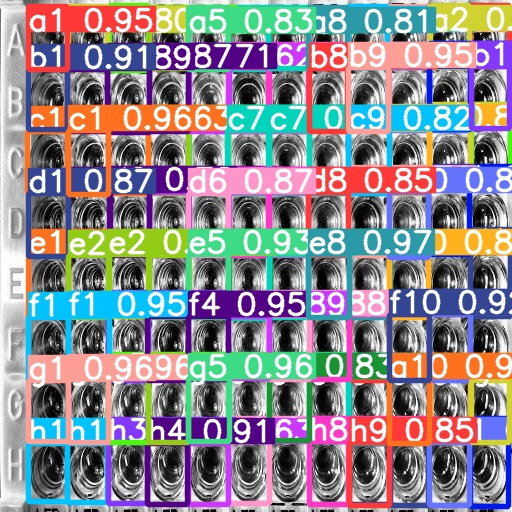

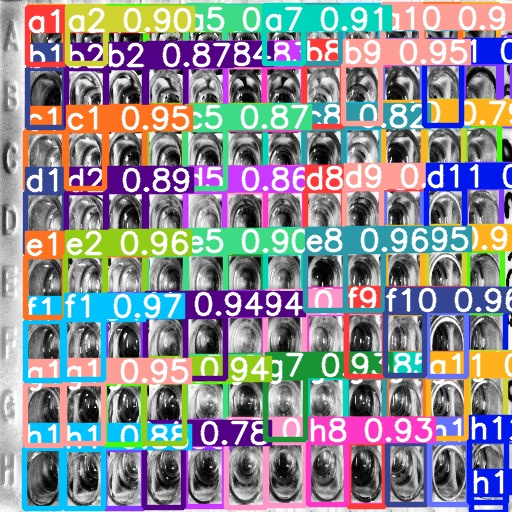

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:2]:
      display(Image(filename=image_path, width=1000,height=1000))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train4/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
# test_set_loc = "/content/IMG_5709.JPG"
# random_test_image = random.choice(os.listdir(test_set_loc))
# print("running inference on " + random_test_image)

pred = model.predict("/content/IMG_5714.JPG", confidence=50, overlap=30).json()

In [ ]:
len(pred['predictions'])

300

In [ ]:
model.predict("/content/IMG_5714.JPG", confidence=85, overlap=0).save("prediction.jpg")

In [ ]:
def non_max_suppression(predictions, iou_threshold=0.5):
    # Sort the predictions based on confidence in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x['confidence'], reverse=True)

    # Initialize an empty list to store the updated predictions
    updated_predictions = []

    # Iterate over the sorted predictions
    while len(sorted_predictions) > 0:
        # Take the prediction with the highest confidence
        selected_pred = sorted_predictions[0]
        updated_predictions.append(selected_pred)

        # Calculate the IoU (Intersection over Union) with all other predictions
        selected_box = [selected_pred['x'], selected_pred['y'], selected_pred['width'], selected_pred['height']]
        ious = []
        for pred in sorted_predictions[1:]:
            box = [pred['x'], pred['y'], pred['width'], pred['height']]
            iou = calculate_iou(selected_box, box)
            ious.append(iou)

        # Filter out predictions with high IoU
        filtered_indices = [i for i, iou in enumerate(ious) if iou < iou_threshold]

        # Update the sorted predictions list
        sorted_predictions = [sorted_predictions[i + 1] for i in filtered_indices]

    return updated_predictions

def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Calculate the coordinates of intersection rectangle
    x_intersection = max(x1, x2)
    y_intersection = max(y1, y2)
    w_intersection = min(x1 + w1, x2 + w2) - x_intersection
    h_intersection = min(y1 + h1, y2 + h2) - y_intersection

    # Calculate the area of intersection rectangle
    intersection_area = max(0, w_intersection) * max(0, h_intersection)

    # Calculate the area of both bounding boxes
    box1_area = w1 * h1
    box2_area = w2 * h2

    # Calculate the IoU
    iou = intersection_area / float(box1_area + box2_area - intersection_area)

    return iou




In [ ]:
updated_predictions = non_max_suppression(pred['predictions'], iou_threshold=0.5)


In [ ]:
new_preds ={
    "predictions":updated_predictions
}

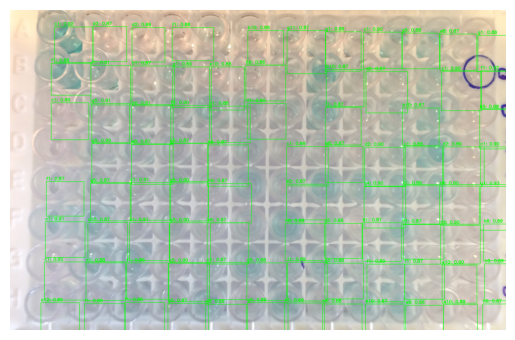

In [ ]:
def extract_rgb_values(image, detections):
    rgb_values = []

    for detection in detections:
        x = detection['x']
        y = detection['y']
        width = detection['width']
        height = detection['height']

        # Extract the region of interest (ROI) from the image
        roi = image[y:y+height, x:x+width]

        # Calculate the average RGB values for the ROI
        avg_rgb = np.mean(roi, axis=(0, 1))

        # Add the RGB values to the list
        rgb_values.append(avg_rgb)

    return rgb_values

# Example usage
image = cv2.imread("/path/to/image.jpg")  # Load the image
detections = [...]  # Your list of detections

rgb_values = extract_rgb_values(image, detections)

# Print the RGB values
for idx, rgb in enumerate(rgb_values):
    print(f"Detection {idx + 1}: RGB = {rgb}")



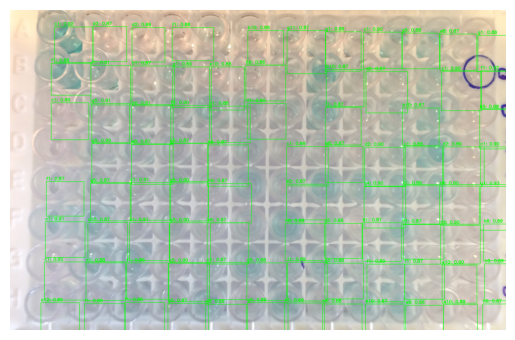

             R           G           B Class
0   198.696995  210.079289  218.040974    g1
1   198.456353  188.778433  187.957878    c1
2   173.318231  181.301037  195.936463    f1
3   162.481506  179.413166  172.201643    c1
4   199.125755  191.902672  185.997208    c1
..         ...         ...         ...   ...
80  191.516003  184.461217  175.937556    e8
81  191.304027  199.560403  201.335208    e8
82  167.293644  188.370023  212.290330    d2
83  165.379461  176.839739  184.399052   e10
84  161.893928  176.233512  187.263889    h6

[85 rows x 4 columns]


In [ ]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

def draw_detections(image, detections):
    image_with_detections = image.copy()
    rgb_values = []

    for detection in detections:
        x = int(detection['x'])
        y = int(detection['y'])
        width = int(detection['width'])
        height = int(detection['height'])
        class_name = detection['class']
        confidence = detection['confidence']

        # Draw bounding box
        cv2.rectangle(image_with_detections, (x, y), (x + width, y + height), (0, 255, 0), 2)

        # Add label with class name and confidence
        label = f"{class_name}: {confidence:.2f}"
        cv2.putText(image_with_detections, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

        # Extract RGB values
        roi = image[y:y + height, x:x + width]
        avg_color_per_row = np.average(roi, axis=0)
        avg_color = np.average(avg_color_per_row, axis=0)
        rgb_values.append(avg_color)

    # Convert RGB values to DataFrame
    df = pd.DataFrame(rgb_values, columns=['R', 'G', 'B'])
    df['Class'] = [detection['class'] for detection in detections]

    return image_with_detections, df

# Example usage
image = cv2.imread("/content/IMG_5709.JPG")  # Load the image

image_with_detections, df = draw_detections(image, new_preds['predictions'])

# Display the image with detections
plt.imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the DataFrame with RGB values
print(df)


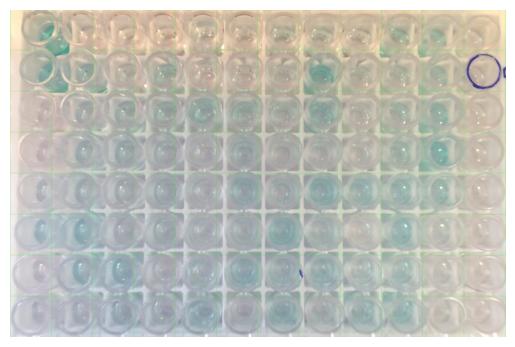

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/IMG_5709.JPG')

# Define the grid size
grid_rows = 8
grid_cols = 12

# Calculate the size of each grid cell
cell_height = image.shape[0] // grid_rows
cell_width = image.shape[1] // grid_cols

# Create an empty list to store RGB values for each grid cell
rgb_values = []

# Iterate over the grid cells
for row in range(grid_rows):
    for col in range(grid_cols):
        # Calculate the coordinates of the current grid cell
        x = col * cell_width
        y = row * cell_height

        # Extract the region of interest (ROI) within the grid cell
        roi = image[y:y+cell_height, x:x+cell_width]

        # Calculate the mean RGB values within the ROI
        mean_rgb = np.mean(roi, axis=(0, 1))

        # Append the mean RGB values to the list
        rgb_values.append(mean_rgb)

# Convert the list of RGB values to a NumPy array
rgb_values = np.array(rgb_values)

# Reshape the array to match the grid dimensions
rgb_values = rgb_values.reshape(grid_rows, grid_cols, 3)

# Draw the grids on the image
for row in range(grid_rows + 1):
    y = row * cell_height
    cv2.line(image, (0, y), (image.shape[1], y), (0, 255, 0), 1)

for col in range(grid_cols + 1):
    x = col * cell_width
    cv2.line(image, (x, 0), (x, image.shape[0]), (0, 255, 0), 1)

# Display the image with grids
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the RGB values for each grid cell
for row in range(grid_rows):
    for col in range(grid_cols):
        print(f"Grid [{row}, {col}] RGB: {rgb_values[row, col]}")


In [ ]:
# Print the RGB values for each grid cell
for row in range(grid_rows):
    for col in range(grid_cols):
        print(f"Grid [{row}, {col}] RGB: {rgb_values[row, col]}")

Grid [0, 0] RGB: [188.01870682 217.52531455 234.55415925]
Grid [0, 1] RGB: [161.9479679  182.19403796 182.96062517]
Grid [0, 2] RGB: [166.66359412 189.33999638 214.28825091]
Grid [0, 3] RGB: [164.59016987 188.2429774  215.5026099 ]
Grid [0, 4] RGB: [162.49660562 186.62031198 210.78297076]
Grid [0, 5] RGB: [160.49506683 185.5726096  208.44520713]
Grid [0, 6] RGB: [160.35408684 186.3165676  206.7050961 ]
Grid [0, 7] RGB: [161.62972573 188.10656851 207.00959479]
Grid [0, 8] RGB: [162.03349123 189.81723139 210.54480584]
Grid [0, 9] RGB: [161.45222219 188.56404067 199.76889539]
Grid [0, 10] RGB: [166.30979392 193.31922276 204.28912591]
Grid [0, 11] RGB: [176.39092719 209.10213318 229.32053526]
Grid [1, 0] RGB: [194.47445916 209.55077995 225.05328425]
Grid [1, 1] RGB: [166.2049905  177.83699424 170.09436382]
Grid [1, 2] RGB: [168.59134659 181.21650122 187.41720725]
Grid [1, 3] RGB: [165.79214314 179.69433968 189.50742238]
Grid [1, 4] RGB: [162.9963039  176.53242012 188.19156383]
Grid [1, 5] 

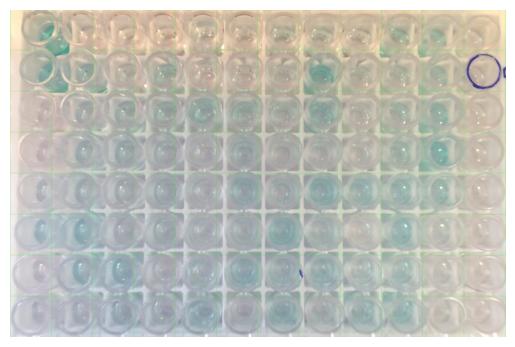

   Cell           R           G           B
0    a1  170.944175  194.944047  201.977840
1    a2  163.238260  184.559721  195.046929
2    a3  166.046817  189.054833  215.155634
3    a4  164.038193  187.881006  215.662283
4    a5  163.163027  187.335653  210.069041
..  ...         ...         ...         ...
91   h8  183.087105  182.233412  176.881534
92   h9  184.380390  186.419143  174.543305
93  h10  185.164323  189.892638  177.519592
94  h11  190.379206  199.191875  204.588297
95  h12  196.451031  205.094658  214.913855

[96 rows x 4 columns]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the image
image = cv2.imread('/content/IMG_5709.JPG')

# Define the grid size
grid_rows = 8
grid_cols = 12

# Calculate the size of each grid cell
cell_height = image.shape[0] // grid_rows
cell_width = image.shape[1] // grid_cols

# Create an empty list to store RGB values and cell names for each grid cell
data = []

# Iterate over the grid cells
for row in range(grid_rows):
    for col in range(grid_cols):
        # Calculate the coordinates of the current grid cell
        x = col * cell_width
        y = row * cell_height

        # Extract the region of interest (ROI) within the grid cell
        roi = image[y:y+cell_height, x:x+cell_width]

        # Calculate the mean RGB values within the ROI
        mean_rgb = np.mean(roi, axis=(0, 1))

        # Generate the cell name
        row_name = chr(ord('a') + row)
        col_name = str(col + 1)
        cell_name = f"{row_name}{col_name}"

        # Append the mean RGB values and cell name to the data list
        data.append([cell_name, mean_rgb[0], mean_rgb[1], mean_rgb[2]])

# Convert the data list to a pandas DataFrame
df = pd.DataFrame(data, columns=['Cell', 'R', 'G', 'B'])

# Draw the grids on the image
for row in range(grid_rows + 1):
    y = row * cell_height
    cv2.line(image, (0, y), (image.shape[1], y), (0, 255, 0), 1)

for col in range(grid_cols + 1):
    x = col * cell_width
    cv2.line(image, (x, 0), (x, image.shape[0]), (0, 255, 0), 1)

# Display the image with grids
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the DataFrame with cell names and RGB values
print(df)
